In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# reading the dataset
df= pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.7,NaN,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...
146,146,6.7,3.0,5.2,2.3,Iris-virginica
147,147,6.3,2.5,5.0,1.9,Iris-virginica
148,148,6.5,3.0,5.2,2.0,Iris-virginica
149,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     1
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#replacing null values by mean values
df.fillna(df['SepalWidthCm'].mean(), inplace=True)

In [ ]:
#checking for unique Spices
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#Label
#Mapping the Species Data
Y = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
Y

0      0
1      0
2      0
3      0
4      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 151, dtype: int64

In [ ]:
#Features
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.500,1.4,0.2
1,4.9,3.000,1.4,0.2
2,4.7,3.200,1.3,0.2
3,4.7,3.054,1.3,0.2
4,4.6,3.100,1.5,0.2
...,...,...,...,...
146,6.7,3.000,5.2,2.3
147,6.3,2.500,5.0,1.9
148,6.5,3.000,5.2,2.0
149,6.2,3.400,5.4,2.3


In [ ]:
#Model Selection
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Model evaluation
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3)

In [ ]:
#Train Your model
kmodel.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

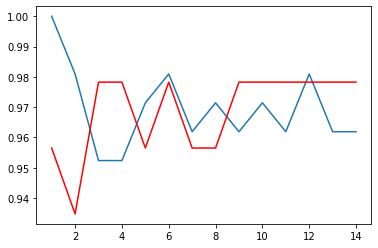

In [ ]:
tra = []
tsa = []
for i in range(1,15):
  km = KNeighborsClassifier(n_neighbors=i)
  km.fit(xtrain,ytrain)
  tra.append(km.score(xtrain,ytrain))
  tsa.append(km.score(xtest,ytest))
plt.plot(range(1,15),tra)
plt.plot(range(1,15),tsa,color='red')
plt.show()

In [ ]:
x1 = X['SepalLengthCm']
x2 = X['SepalWidthCm']
x3 = X['PetalLengthCm']
x4 = X['PetalWidthCm']
Y

0      0
1      0
2      0
3      0
4      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 151, dtype: int64

In [ ]:
yc = Y.map({0:'r', 1:'g', 2:'b'})

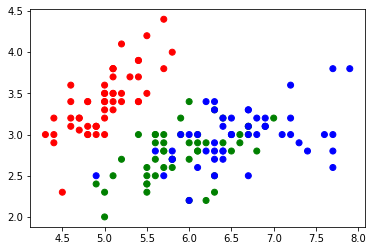

In [ ]:
plt.scatter(x1,x2,c=yc)
plt.show()

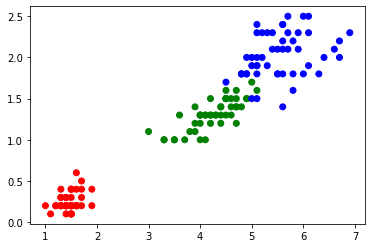

In [ ]:
plt.scatter(x3,x4,c=yc)
plt.show()

From the above plotted plots, we can conclude that **PetalLengthCm** and **PetalWidthCm** play a major role in the prediction

In [ ]:
#Making Predictions
kmodel.predict([[1.2,4.3,2.2,2.1]])

array([0])

In [ ]:
i = np.array([['setosa'],'versicolor','virginica'])
print(i[kmodel.predict([[1.2,4.3,2.2,2.1], [1.2,4.3,6.2,5.1]])])

[list(['setosa']) 'virginica']
